In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit

Historical electricity generation from Our World in Data https://ourworldindata.org/grapher/electricity-generation

In [321]:
hist_el_gen = pd.read_csv("electricity-generation.csv")
hist_el_gen

,Entity,Code,Year,Electricity generation (TWh)
0,ASEAN (Ember),NaN,2000,368.65
1,ASEAN (Ember),NaN,2001,397.19
2,ASEAN (Ember),NaN,2002,422.82
3,ASEAN (Ember),NaN,2003,447.15
4,ASEAN (Ember),NaN,2004,484.94
...,...,...,...,...
7186,Zimbabwe,ZWE,2017,7.35
7187,Zimbabwe,ZWE,2018,9.19
7188,Zimbabwe,ZWE,2019,8.24
7189,Zimbabwe,ZWE,2020,7.59


In [2]:
def f_logistic(x, L ,x0, k):
    y = L-L / (1 + np.exp(-k*(x-x0)))
    return (y)

In [235]:
name_crosswalk = pd.read_excel("../../data/country_names.xlsx",sheet_name="crosswalk")
reform = pd.read_csv("../../analysis/_data_process/_all_temporal_power_reform.csv")
reform = pd.merge(reform,name_crosswalk[["Country Code","Reform_Name"]],left_on="country",right_on="Reform_Name")
reform

,country,year,source,R_IndepProducer,R_Private,R_Unbundle,R_WholeSale,R_IndepReg,R_Choice,R_Liberalization,R_Corp,Country Code,Reform_Name
0,Greece,1999.0,Erdogdu 2011,0,0,1,0,1,0,1,0,GRC,Greece
1,Greece,2000.0,Erdogdu 2011,0,0,1,0,1,0,1,1,GRC,Greece
2,Greece,2001.0,Erdogdu 2011,0,0,1,0,1,1,1,1,GRC,Greece
3,Greece,2002.0,Erdogdu 2011,0,1,1,0,1,1,1,1,GRC,Greece
4,Greece,2003.0,Erdogdu 2011,0,1,1,0,1,1,1,1,GRC,Greece
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6955,Mozambique,2017.0,assumption,1,0,0,0,1,0,1,1,MOZ,Mozambique
6956,Mozambique,2018.0,assumption,1,0,0,0,1,0,1,1,MOZ,Mozambique
6957,Mozambique,2019.0,assumption,1,0,0,0,1,0,1,1,MOZ,Mozambique
6958,Mozambique,2020.0,assumption,1,0,0,0,1,0,1,1,MOZ,Mozambique


In [38]:
crosswalk = pd.read_excel("../../data/MESSAGE/mapping_file_R10edit.xlsx",sheet_name="main")
AR6_list = crosswalk["AR6_R10"].unique()
crosswalk.head()

,Countries,R10,AR6_R10,GEM_Name,ISO
0,Algeria,Africa (R10),R10AFRICA,Algeria,DZA
1,Angola,Africa (R10),R10AFRICA,Angola,AGO
2,Benin,Africa (R10),R10AFRICA,NaN,BEN
3,Botswana,Africa (R10),R10AFRICA,NaN,BWA
4,Burkina Faso,Africa (R10),R10AFRICA,NaN,BFA


In [11]:
hist_data = pd.read_csv("../RandomForest/coalgas_hist.csv")
hist_data = hist_data[['Country Code', 'year', 'Coal_Current_GW', 'Gas_Current_GW']]
hist_data

,Country Code,year,Coal_Current_GW,Gas_Current_GW
0,DEU,1927,0.036,0.000
1,DEU,1928,0.036,0.000
2,DEU,1929,0.036,0.000
3,DEU,1930,0.036,0.000
4,DEU,1931,0.036,0.000
...,...,...,...,...
3878,BRN,2021,0.220,0.212
3879,BRN,2022,0.220,0.212
3880,ARE,2020,0.600,38.467
3881,ARE,2021,1.200,40.652


# coal growth rate

In [12]:
for cntry in hist_data["Country Code"].unique():
    cntry_data = hist_data[hist_data["Country Code"]==cntry]
    for i in cntry_data.index[1:]:
        hist_data.loc[i,"Coal_Prev_GW"] = hist_data.loc[i-1,"Coal_Current_GW"]
        hist_data.loc[i,"Coal_PhaseOut_GW"] = hist_data.loc[i,"Coal_Current_GW"] - hist_data.loc[i,"Coal_Prev_GW"]
hist_data["Perc_Coal_PhaseOut"] = hist_data["Coal_PhaseOut_GW"]/hist_data["Coal_Prev_GW"]
hist_data = hist_data.fillna(0)
hist_data 

,Country Code,year,Coal_Current_GW,Gas_Current_GW,Coal_Prev_GW,Coal_PhaseOut_GW,Perc_Coal_PhaseOut
0,DEU,1927,0.036,0.000,0.000,0.0,0.0
1,DEU,1928,0.036,0.000,0.036,0.0,0.0
2,DEU,1929,0.036,0.000,0.036,0.0,0.0
3,DEU,1930,0.036,0.000,0.036,0.0,0.0
4,DEU,1931,0.036,0.000,0.036,0.0,0.0
...,...,...,...,...,...,...,...
3878,BRN,2021,0.220,0.212,0.220,0.0,0.0
3879,BRN,2022,0.220,0.212,0.220,0.0,0.0
3880,ARE,2020,0.600,38.467,0.000,0.0,0.0
3881,ARE,2021,1.200,40.652,0.600,0.6,1.0


In [167]:
# countries showing decline trend
decline_countries = hist_data[hist_data["Coal_PhaseOut_GW"]<0]["Country Code"].unique()
len(decline_countries)

40

In [334]:
logistic_result = pd.DataFrame(data={"Country Code":decline_countries,
                                        "L":np.nan,"x0":np.nan,"k":np.nan}).set_index("Country Code")
for cntry in decline_countries:
    hist_data_select = hist_data[hist_data["Country Code"]==cntry]
    peak_year = hist_data_select[hist_data_select["Coal_Current_GW"]==hist_data_select["Coal_Current_GW"].max()]["year"].min()
    hist_data_select = hist_data_select[hist_data_select["year"]>=peak_year]
    if len(hist_data_select[hist_data_select["Coal_PhaseOut_GW"]<0])!=0:
        start_year = hist_data_select[hist_data_select["Coal_PhaseOut_GW"]<0]["year"].iloc[0]
        hist_start = hist_data_select[hist_data_select["year"]>=start_year]
        hist_start = hist_start.sort_values(by="year")
        if len(hist_start)>=6:
            # only consider more than 6 data points (Vinichenko 2023)
            ratio = hist_start["Coal_Current_GW"].iloc[-1]/hist_start["Coal_Current_GW"].max()
            if ratio <0.9 and hist_start["Coal_Current_GW"].max()>5: 
                # only consider more than 5% 
                xdata = hist_start["year"]
                ydata = hist_start["Coal_Current_GW"]
                L_fixed = max(ydata)
                popt, pcov = curve_fit(lambda x, x0, k: f_logistic(x, L_fixed, x0, k), xdata,ydata,[2030,0.05], method='lm', maxfev=5000) 
                residuals = ydata- f_logistic(xdata, L_fixed,popt[0],popt[1])
                ss_res = np.sum(residuals**2)
                ss_tot = np.sum((ydata-np.mean(ydata))**2)
                r_squared = 1 - (ss_res / ss_tot)
                logistic_result.loc[cntry,"L"] = L_fixed
                logistic_result.loc[cntry,"x0"] = popt[0]
                logistic_result.loc[cntry,"k"] = popt[1]
                logistic_result.loc[cntry,"start_year"] = start_year
                logistic_result.loc[cntry,"ratio"] = ratio
                logistic_result.loc[cntry,"max_capacity"] = hist_start["Coal_Current_GW"].max()
                logistic_result.loc[cntry,"R2"] = r_squared
                if popt[0] <2021:
                    x0 = round(popt[0])
                    el_gen = hist_el_gen.query("Code==@cntry").query("Year==@x0")["Electricity generation (TWh)"].iloc[0]
                else:
                    el_gen = hist_el_gen.query("Code==@cntry")["Electricity generation (TWh)"].iloc[-1]
                logistic_result.loc[cntry,"TWh"] = el_gen
        else:
            continue
logistic_result["rate"] = -logistic_result["L"]*logistic_result["k"]/4
logistic_result["rate_percent"] = logistic_result["rate"]/(logistic_result["L"]*0.5)*100
logistic_result["rate_Cherp"] = logistic_result["rate"]/logistic_result["TWh"]*1000
logistic_result = logistic_result.dropna()
logistic_result = pd.merge(logistic_result,crosswalk[["AR6_R10","ISO"]],left_index=True,right_on="ISO")
logistic_result.set_index("ISO").to_csv("hist_log_growthRate_coal.csv")
logistic_result

,L,x0,k,start_year,ratio,max_capacity,R2,TWh,rate,rate_percent,rate_Cherp,AR6_R10,ISO
70,52.18710,2025.498952,0.347052,2016.0,0.783523,52.18710,0.876840,582.28,-4.527907,-17.352591,-7.776168,R10EUROPE,DEU
149,333.74401,2023.545430,0.265224,2012.0,0.635342,333.74401,0.939092,4296.88,-22.129270,-13.261224,-5.150079,R10NORTH_AM,USA
87,6.14600,2036.413375,0.099362,2013.0,0.837781,6.14600,0.373884,50.58,-0.152670,-4.968101,-3.018382,R10EUROPE,BGR
83,8.92110,2028.316493,0.266007,2008.0,0.840659,8.92110,0.657876,85.11,-0.593269,-13.300347,-6.970610,R10EUROPE,CZE
68,13.72060,2019.493498,0.366144,2006.0,0.214677,13.72060,0.901056,270.89,-1.255929,-18.307209,-4.636308,R10EUROPE,ESP
74,9.82700,2024.247930,0.309620,2014.0,0.692582,9.82700,0.901741,278.86,-0.760659,-15.481010,-2.727747,R10EUROPE,ITA
81,34.65650,2015.857453,0.298928,2000.0,0.151025,34.65650,0.985865,336.28,-2.589953,-14.946419,-7.701775,R10EUROPE,GBR
147,18.54420,2017.045927,0.187573,2000.0,0.253815,18.54420,0.935554,644.70,-0.869599,-9.378664,-1.348843,R10NORTH_AM,CAN
150,30.51400,2029.254867,0.166574,2010.0,0.800846,30.51400,0.808910,251.68,-1.270706,-8.328676,-5.048896,R10PAC_OECD,AUS
66,8.44800,2017.371652,0.232013,2000.0,0.296757,8.44800,0.913933,556.08,-0.490011,-11.600643,-0.881188,R10EUROPE,FRA


In [168]:
select_logistic_result = logistic_result[logistic_result["R2"]>0.8]
select_logistic_result = select_logistic_result.sort_values(by="max_capacity")
len(select_logistic_result)

9

Text(0, 0.5, 'Logistic fitted growth rate (%)')

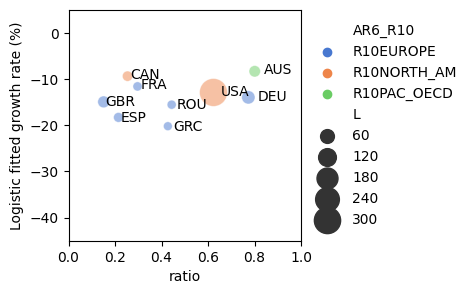

In [166]:
fig, axes = plt.subplots(figsize=(3,3))
sns.scatterplot(x="ratio", y="rate_percent", size="L",hue="AR6_R10", 
            sizes=(40, 400), alpha=.5, palette="muted",
            data=select_logistic_result,ax=axes)
x = list(select_logistic_result["ratio"])
y = list(select_logistic_result["rate_percent"])
text = list(select_logistic_result["ISO"])
for i in np.arange(len(x)):
    axes.text(x[i]*1.05,y[i]*1.05,text[i], horizontalalignment='left')
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
axes.set_xlim([0,1])
axes.set_ylim([-45,5])
axes.set_ylabel("Logistic fitted growth rate (%)")

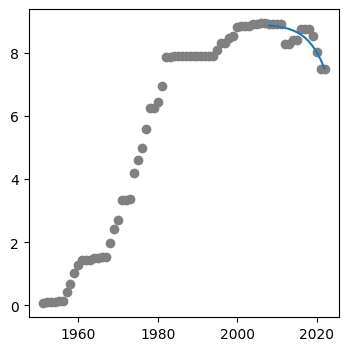

In [319]:
fig, axes = plt.subplots(figsize=(4,4))
cntry="CZE"
hist_data_select = hist_data[hist_data["Country Code"]==cntry]
start_year = hist_data_select[hist_data_select["Coal_PhaseOut_GW"]<0]["year"].iloc[0]
hist_start = hist_data_select[hist_data_select["year"]>=start_year]
log_result = logistic_result.query("ISO==@cntry")
y_model = f_logistic(list(hist_start["year"]),log_result["L"].iloc[0] ,log_result["x0"].iloc[0], log_result["k"].iloc[0])
#plot_data = maxRate_data[maxRate_data["Country Code"]=="CHN"]
#plot_data1 = hist_data[hist_data["Country Code"]=="CHN"]
plt.plot(hist_data_select["year"], hist_data_select["Coal_Current_GW"], 'o', color="grey",label='data')
plt.plot(hist_start["year"], y_model, '-', label='data')

### 5 year fitting

In [305]:
count = 0
for cntry in decline_countries:
    hist_data_select = hist_data[hist_data["Country Code"]==cntry]
    start_year = hist_data_select[hist_data_select["Coal_PhaseOut_GW"]<0]["year"].iloc[0]
    hist_start = hist_data_select[hist_data_select["year"]>=start_year]
    hist_start = hist_start.sort_values(by="year").set_index("year")
    if len(hist_start)>=6:
        range_list = hist_start.index[5:]
        decline_result = pd.DataFrame(data={"Country Code":cntry,"range":range_list}).set_index("range")
        for i in np.arange(len(hist_start.index))[5:]:
            end_val = hist_start.index[i]
            start_val = hist_start.index[i-5]
            if hist_start.loc[start_val,"Coal_Current_GW"]!=0:
                decline_result.loc[end_val,"growth_rate"] = np.exp(np.log(hist_start.loc[end_val,"Coal_Current_GW"]/hist_start.loc[start_val,"Coal_Current_GW"])/5)-1
                decline_result.loc[end_val,"Capacity (GW)"] = hist_start.loc[start_val,"Coal_Current_GW"]
                decline_result.loc[end_val,"percent"] = hist_start.loc[end_val,"Coal_Current_GW"]/hist_start["Coal_Current_GW"].max()
                decline_result.loc[end_val,"duration"] = end_val-hist_start.index[0]
        if count == 0:
            all_decline_result = decline_result
        else:
            all_decline_result = pd.concat([all_decline_result,decline_result])
        count = count + 1
all_decline_result = all_decline_result.reset_index()
all_decline_result = pd.merge(all_decline_result,crosswalk[["AR6_R10","ISO"]],left_on="Country Code",right_on="ISO")
all_decline_result = all_decline_result.dropna()
all_decline_result = all_decline_result.drop(columns="Country Code")
all_decline_result = pd.merge(all_decline_result,reform[["Country Code","R_Choice","year"]],left_on=["ISO","range"],right_on=["Country Code","year"])
all_decline_result.set_index("year").to_csv("hist_5y_growthRate_coal.csv")
all_decline_result

C:\Users\jx920\AppData\Local\Temp\ipykernel_23848\1642684474.py:14: RuntimeWarning: divide by zero encountered in log
  decline_result.loc[end_val,"growth_rate"] = np.exp(np.log(hist_start.loc[end_val,"Coal_Current_GW"]/hist_start.loc[start_val,"Coal_Current_GW"])/5)-1
C:\Users\jx920\AppData\Local\Temp\ipykernel_23848\1642684474.py:14: RuntimeWarning: divide by zero encountered in log
  decline_result.loc[end_val,"growth_rate"] = np.exp(np.log(hist_start.loc[end_val,"Coal_Current_GW"]/hist_start.loc[start_val,"Coal_Current_GW"])/5)-1
C:\Users\jx920\AppData\Local\Temp\ipykernel_23848\1642684474.py:14: RuntimeWarning: divide by zero encountered in log
  decline_result.loc[end_val,"growth_rate"] = np.exp(np.log(hist_start.loc[end_val,"Coal_Current_GW"]/hist_start.loc[start_val,"Coal_Current_GW"])/5)-1
C:\Users\jx920\AppData\Local\Temp\ipykernel_23848\1642684474.py:14: RuntimeWarning: divide by zero encountered in log
  decline_result.loc[end_val,"growth_rate"] = np.exp(np.log(hist_start.l

,range,growth_rate,Capacity (GW),percent,duration,AR6_R10,ISO,Country Code,R_Choice,year
0,2006,-0.002045,52.1416,0.976233,5.0,R10EUROPE,DEU,DEU,1,2006.0
1,2007,-0.003910,52.6316,0.976233,6.0,R10EUROPE,DEU,DEU,1,2007.0
2,2008,-0.002309,52.2106,0.976233,7.0,R10EUROPE,DEU,DEU,1,2008.0
3,2009,-0.001845,52.1206,0.976819,8.0,R10EUROPE,DEU,DEU,1,2009.0
4,2010,0.000449,51.6106,0.978427,9.0,R10EUROPE,DEU,DEU,1,2010.0
...,...,...,...,...,...,...,...,...,...,...
323,2017,-0.077892,0.7500,0.666667,5.0,R10PAC_OECD,NZL,NZL,1,2017.0
324,2018,0.000000,0.5000,0.666667,6.0,R10PAC_OECD,NZL,NZL,1,2018.0
325,2019,0.000000,0.5000,0.666667,7.0,R10PAC_OECD,NZL,NZL,1,2019.0
326,2020,0.000000,0.5000,0.666667,8.0,R10PAC_OECD,NZL,NZL,1,2020.0


Text(0, 0.5, 'Growth rate')

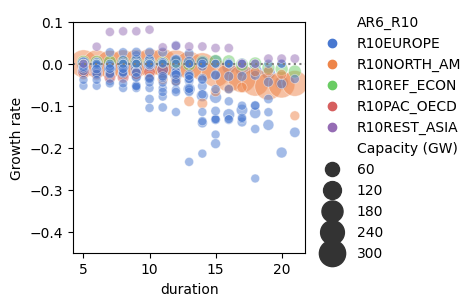

In [275]:
fig, axes = plt.subplots(figsize=(3,3))
sns.scatterplot(x="duration", y="growth_rate", size="Capacity (GW)",
            sizes=(40, 400), hue="AR6_R10", alpha=.5, palette="muted",
            data=all_decline_result[all_decline_result["Capacity (GW)"]>1],ax=axes)
axes.legend(loc='center left', bbox_to_anchor=(1, 0.5),frameon=False)
axes.set_ylim([-0.45,0.10])
#axes.set_xlim([-0.05,1.05])
axes.axhline(0,color="gray",linestyle=":")
#axes.set_xlabel("Share of peak coal capacity")
axes.set_ylabel("Growth rate")

# gas growth rate

In [304]:
count = 0
for cntry in hist_data["Country Code"].unique():
    hist_data_select = hist_data[hist_data["Country Code"]==cntry]
    hist_data_select = hist_data_select[hist_data_select["year"]>=1995]
    hist_data_select = hist_data_select.set_index("year")
    if len(hist_data_select)>6:
        range_list = hist_data_select.index[5:]
        growth_result = pd.DataFrame(data={"Country Code":cntry,"year":range_list}).set_index("year")
        for i in range_list:
            end_val = hist_data_select.loc[i,"Gas_Current_GW"]
            start_val = hist_data_select.loc[i-5,"Gas_Current_GW"]
            if start_val!=0 and end_val!=0:
                growth_result.loc[i,"growth_rate"] = np.exp(np.log(end_val/start_val)/5)-1
                growth_result.loc[i,"Capacity (GW)"] = hist_data_select.loc[i,"Gas_Current_GW"]
        if count == 0:
            all_growth_result = growth_result
        else:
            all_growth_result = pd.concat([all_growth_result,growth_result])
        count = count + 1
all_growth_result = all_growth_result.reset_index()
all_growth_result = pd.merge(all_growth_result,crosswalk[["AR6_R10","ISO"]],left_on="Country Code",right_on="ISO")
all_growth_result = all_growth_result.dropna()
all_growth_result = pd.merge(all_growth_result,reform[["Country Code","R_Choice","year"]],left_on=["Country Code","year"],right_on=["Country Code","year"])
all_growth_result.set_index("year").to_csv("hist_5y_growthRate_gas.csv")
all_growth_result

,year,Country Code,growth_rate,Capacity (GW),AR6_R10,ISO,R_Choice
0,2000,DEU,0.071852,12.543,R10EUROPE,DEU,1
1,2001,DEU,0.049329,12.787,R10EUROPE,DEU,1
2,2002,DEU,0.038668,12.900,R10EUROPE,DEU,1
3,2003,DEU,0.031827,12.986,R10EUROPE,DEU,1
4,2004,DEU,0.036718,13.553,R10EUROPE,DEU,1
...,...,...,...,...,...,...,...
1160,2021,SYR,0.024770,6.513,R10MIDDLE_EAST,SYR,0
1161,2021,SEN,0.167503,0.436,R10AFRICA,SEN,0
1162,2019,TJK,0.000000,0.206,R10REF_ECON,TJK,0
1163,2020,TJK,0.000000,0.206,R10REF_ECON,TJK,0
